In [1]:
import fnmatch
import pandas as pd
import os
import torch

from metient.util import eval_util as eutil
from metient.util import plotting_util as putil

from metient.util.globals import *

x = 0
k = float("inf")
LOSS_THRES = 0.0

SITES = ["m5", "m8"]
MIG_TYPES = ["mS", "M", "S", "R"]

def get_overall_pattern(pattern):
    # 3 options: single-source, multi-source, reseeding
    return pattern.split(" ")[1]

def get_ground_truth_pattern(site, mig_type, seed):
    labeling_fn = os.path.join(SIMS_DIR, site, mig_type, f"T_seed{seed}.vertex.labeling")
    tree_fn = os.path.join(SIMS_DIR, site, mig_type, f"T_seed{seed}.tree")
    true_edges, true_mig_edges, true_labeling = eutil.parse_clone_tree(tree_fn, labeling_fn)
    del true_labeling['GL']
    num_nodes = len(true_labeling)
    num_sites = len(set(list(true_labeling.values())))
    node_label_to_idx = {k:i for i,k in enumerate(list(true_labeling.keys()))}
    A = torch.zeros((num_nodes, num_nodes))
    for edge in true_edges:
        if edge[0] == "GL":
            continue
        A[node_label_to_idx[edge[0]], node_label_to_idx[edge[1]]] = 1
    
    site_label_to_idx = {k:i for i,k in enumerate(set(list(true_labeling.values())))}
    V = torch.zeros((num_sites, num_nodes))
    for node_label in true_labeling:
        site_label = true_labeling[node_label]
        V[site_label_to_idx[site_label], node_label_to_idx[node_label]] = 1
    return " ".join(putil.get_verbose_seeding_pattern(V,A).split()[1:])

SIMS_DIR = "/data/morrisq/divyak/projects/machina/data/sims/"

def get_gt_mig_type_to_top_seeding_pattern(prediction_dir, suffix):
    gt_mig_type_to_top_seeding_pattern = { }

    for mig_type in MIG_TYPES:
        for site in SITES:
            print(site, mig_type)
            site_mig_type_dir = os.path.join(SIMS_DIR, site, mig_type)
            seeds = fnmatch.filter(os.listdir(site_mig_type_dir), 'clustering_observed_seed*.txt')
            seeds = [s.replace(".txt", "").replace("clustering_observed_seed", "") for s in seeds]
            for seed in seeds:
                predicted_site_mig_type_data_dir = os.path.join(prediction_dir, site, mig_type)
                tree_info = eutil.get_metient_min_loss_trees(predicted_site_mig_type_data_dir, seed, k, loss_thres=LOSS_THRES, suffix=suffix)
                for i, (loss, met_results_dict, met_tree_num) in enumerate(tree_info):
                    V = torch.tensor(met_results_dict[OUT_LABElING_KEY][met_tree_num])
                    A = torch.tensor(met_results_dict[OUT_ADJ_KEY][met_tree_num])
                    seeding_pattern = " ".join(putil.get_verbose_seeding_pattern(V,A).split()[1:])
                    gt_pattern = get_ground_truth_pattern(site, mig_type, seed)
                    if gt_pattern not in gt_mig_type_to_top_seeding_pattern:
                        gt_mig_type_to_top_seeding_pattern[gt_pattern] = []
                    gt_mig_type_to_top_seeding_pattern[gt_pattern].append(seeding_pattern) 
    return gt_mig_type_to_top_seeding_pattern



CUDA GPU: False


/lila/home/koyyald/mambaforge/envs/met/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
calibrate_prediction_dir = "/data/morrisq/divyak/data/metient_prediction_results/predictions_bs1024_calibrate_wip_parsweight10xgen_01302024"

calibrate_gt_mig_type_to_top_seeding_pattern = get_gt_mig_type_to_top_seeding_pattern(calibrate_prediction_dir, "_evaluate")
calibrate_gt_mig_type_to_top_seeding_pattern

m5 mS
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m8 mS
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m5 M
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m8 M
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m5 S
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss tr

{'primary single-source seeding': ['primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding'],
 'single-source seeding': ['primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
 

In [3]:
evaluate_prediction_dir = "/data/morrisq/divyak/data/metient_prediction_results/predictions_bs1024_evaluate_wip_01292024"

evaluate_gt_mig_type_to_top_seeding_pattern = get_gt_mig_type_to_top_seeding_pattern(evaluate_prediction_dir, "_evaluate")
evaluate_gt_mig_type_to_top_seeding_pattern

m5 mS
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m8 mS
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m5 M
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m8 M
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
m5 S
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss trees: 1
# min loss tr

{'primary single-source seeding': ['primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding'],
 'single-source seeding': ['primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'single-source seeding',
  'single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
  'primary single-source seeding',
 

In [4]:
def get_percent_right(dct):
    for gt_pattern in dct:
        pct_right = (dct[gt_pattern].count(gt_pattern))/len(dct[gt_pattern])
        print(gt_pattern, pct_right)
print('evaluate')
get_percent_right(evaluate_gt_mig_type_to_top_seeding_pattern)

print('calibrate')
get_percent_right(calibrate_gt_mig_type_to_top_seeding_pattern)

evaluate
primary single-source seeding 0.9375
single-source seeding 0.4482758620689655
multi-source seeding 0.75
reseeding 0.3125
calibrate
primary single-source seeding 0.9375
single-source seeding 0.4482758620689655
multi-source seeding 0.8
reseeding 0.3333333333333333


### What is the confusion matrix for the top seeding pattern in calibrate vs evaluate?

In [5]:
def confusion_matrix(cm, title, output_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=True,)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

['primary single-source seeding', 'single-source seeding', 'multi-source seeding', 'reseeding']


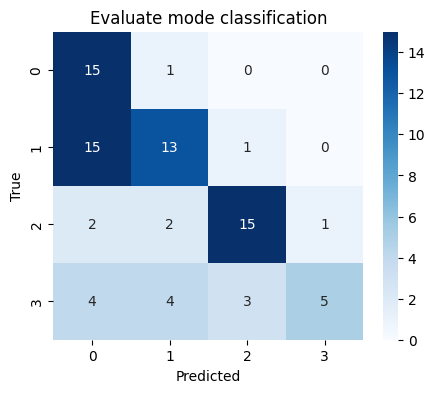

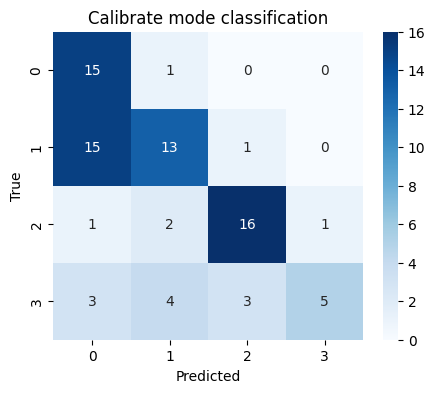

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
patterns = [k for k in calibrate_gt_mig_type_to_top_seeding_pattern.keys()]
print(patterns)

for mode, data in zip(["Evaluate", "Calibrate"], [evaluate_gt_mig_type_to_top_seeding_pattern, calibrate_gt_mig_type_to_top_seeding_pattern]):
    cm = np.zeros((len(patterns), len(patterns)))
    for i,gt_pattern in enumerate(patterns):
        pred_patterns = data[gt_pattern]
        for pred_pattern in pred_patterns:
            j = patterns.index(pred_pattern)
            cm[i,j] += 1
    confusion_matrix(cm, f"{mode} mode classification","")
